## Постановка задачи

In [85]:
from IPython.display import IFrame
IFrame(src='https://7reuv.csb.app/', width=700, height=600)

## From-Linear-to-Logistic-Regression-Explained-Step-by-Step
#### refs: https://github.com/clareyan/From-Linear-to-Logistic-Regression-Explained-Step-by-Step




<div>
<img src="images/4_1.png" width="1000"/>
</div>

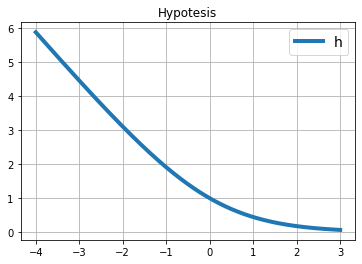

In [93]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

xx = np.linspace(-4,3,100000)

plt.plot(xx, [-np.log2(1/(1+2.76**(-x)))  for x in xx], linewidth=4, label='h')

plt.title('Hypotesis')
plt.grid()
plt.legend(prop={'size': 14});

<div>
<img src="images/4_2.png" width="1000"/>
</div>

## LogisticRegression



<div>
<img src="https://miro.medium.com/max/1610/1*dpgUu5e-bO6QLyyoScmwIg.png" width="500"/>
</div>

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
!wget https://raw.githubusercontent.com/clareyan/From-Linear-to-Logistic-Regression-Explained-Step-by-Step/master/Social_Network_Ads.csv


--2022-01-24 01:04:49--  https://raw.githubusercontent.com/clareyan/From-Linear-to-Logistic-Regression-Explained-Step-by-Step/master/Social_Network_Ads.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10926 (11K) [text/plain]
Saving to: 'Social_Network_Ads.csv'

     0K ..........                                            100% 2.57M=0.004s

2022-01-24 01:04:49 (2.57 MB/s) - 'Social_Network_Ads.csv' saved [10926/10926]



## Importing the dataset

In [47]:

df = pd.read_csv('Social_Network_Ads.csv')

In [8]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [9]:
df.head(30)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [48]:
df_getdummy=pd.get_dummies(data=df, columns=['Gender'])

In [18]:
print(df_getdummy)

      User ID  Age  EstimatedSalary  Purchased  Gender_Female  Gender_Male
0    15624510   19            19000          0              0            1
1    15810944   35            20000          0              0            1
2    15668575   26            43000          0              1            0
3    15603246   27            57000          0              1            0
4    15804002   19            76000          0              0            1
..        ...  ...              ...        ...            ...          ...
395  15691863   46            41000          1              1            0
396  15706071   51            23000          1              0            1
397  15654296   50            20000          1              1            0
398  15755018   36            33000          0              0            1
399  15594041   49            36000          1              1            0

[400 rows x 6 columns]


In [59]:
#X = df_getdummy.drop('Purchased',axis=1)
#y = df_getdummy['Purchased']
X = df_getdummy.iloc[:, [1, 2]].values
y = df_getdummy.iloc[:, 3].values

In [60]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [61]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

> Q1: Что делает StandardScaler ?

In [62]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [63]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [64]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[65,  3],
       [ 8, 24]], dtype=int64)

> Q2: Как вычислить точность используя матрицу ошибок ?

In [65]:
#caculate the accuracy score
# Accuracy = number of times you're right / number of predictions
from sklearn.metrics import accuracy_score

In [66]:
accuracy_score(y_true=y_train, y_pred=classifier.predict(X_train))

0.8233333333333334

> Q3: Как повлияет пол на результат ?

## SVM

In [79]:
# Fitting SVM to the Training set using Kernel as linear.
from sklearn.svm import SVC
classifier = SVC(kernel='linear',random_state=0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [80]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [81]:
confusion_matrix(y_test, y_pred)

array([[66,  2],
       [ 8, 24]], dtype=int64)

In [82]:
accuracy_score(y_true=y_train, y_pred=classifier.predict(X_train))

0.8233333333333334

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


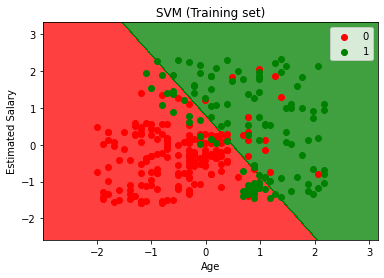

In [83]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


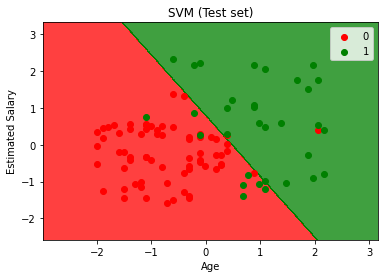

In [84]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

> Q4: Можно ли улучшить точность используя rbf ядро?